1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
movies_data = pd.read_csv('imdb_movies.csv')
movies_data.drop_duplicates(inplace=True)
movies_data.drop_duplicates(subset= ['original_title'] ,inplace=True)
movies_data['release_year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10571, dtype: int64

In [2]:
movies_per_year = movies_data.groupby('release_year')['id'].count()
movie_count_table = pd.DataFrame(movies_per_year ).rename(columns={'release_year':'Release_Year' , 'id' : 'Movies_Count'} , )
movie_count_table

,Movies_Count
release_year,
1960,25
1961,28
1962,29
1963,29
1964,41
1965,34
1966,42
1967,35
1968,35


2

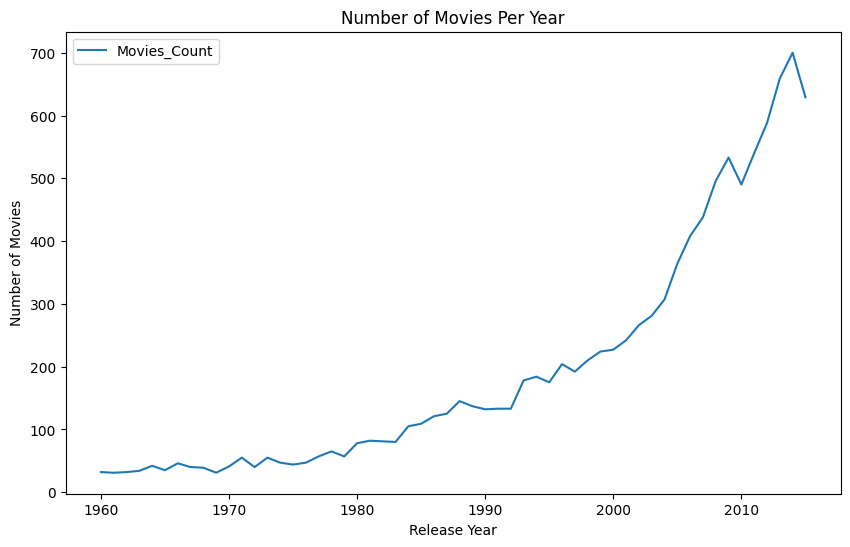

In [90]:

movie_count_table.plot(kind='line', figsize=(10, 6))
plt.title('Number of Movies Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

3

In [3]:

for i, movie_time in enumerate(movies_data['runtime']):
    if movie_time < 10 or movie_time > 600 : 
        movies_data.loc[i, 'runtime'] = np.nan
#print(movies_data)'''
mean_runtime = movies_data['runtime'].mean()
print(mean_runtime)

101.98140693885375


4

In [4]:
avg = movies_data.groupby('release_year')['runtime'].mean()
#print(avg)

fmt = avg.apply(lambda minutes: f"{int(minutes // 60)}h:{int(minutes % 60 )}m")
pd.DataFrame(fmt)

,runtime
release_year,
1960.0,1h:47m
1961.0,2h:1m
1962.0,2h:3m
1963.0,1h:52m
1964.0,1h:48m
1965.0,1h:55m
1966.0,1h:46m
1967.0,1h:44m
1968.0,1h:46m


5

In [8]:
movies_runtimes=movies_data[["original_title", "runtime"]]
for i, movie in enumerate(movies_data['runtime']):
    if movie <= 2: 
        movies_data.loc[i, 'runtime'] = np.nan
movies_runtimes = movies_runtimes.sort_values("runtime", ascending=False)
movies_runtimes.reset_index(inplace=True)
movies_runtimes.drop(columns="index", inplace=True)
longest_movie = movies_runtimes.iloc[0,0]
shortest_movies = movies_runtimes[movies_runtimes["runtime"] ==2]
shortest_movies = shortest_movies.original_title.values.tolist()
result = {"longest": longest_movie, "shortest": shortest_movies}
result

{'longest': 'The Story of Film: An Odyssey',
 'shortest': ['Fresh Guacamole',
  'Bambi Meets Godzilla',
  'Luxo Jr.',
  'The Adventures of AndrÃ© and Wally B.',
  'Cousin Ben Troop Screening']}

6

In [10]:
longest_per_year = movies_data.groupby("release_year")["runtime"].max().reset_index()
shortest_per_year = movies_data.groupby("release_year")["runtime"].min().reset_index()
longest_per_year.set_index('release_year', inplace=True)
shortest_per_year.set_index('release_year', inplace=True)
result = pd.DataFrame({'longest': longest_per_year['runtime'], 'shortest': shortest_per_year['runtime']})

print(result)



              longest  shortest
release_year                   
1960.0          208.0      70.0
1961.0          186.0      79.0
1962.0          216.0      78.0
1963.0          248.0      18.0
1964.0          170.0      28.0
1965.0          199.0      25.0
1966.0          182.0      25.0
1967.0          150.0       4.0
1968.0          155.0       4.0
1969.0          158.0       2.0
1970.0          225.0      48.0
1971.0          189.0      73.0
1972.0          175.0      78.0
1973.0          151.0      25.0
1974.0          200.0       5.0
1975.0          184.0      72.0
1976.0          139.0      80.0
1977.0          177.0      48.0
1978.0          183.0      76.0
1979.0          171.0      78.0
1980.0          219.0      74.0
1981.0          195.0      55.0
1982.0          191.0       6.0
1983.0          197.0      13.0
1984.0          229.0       2.0
1985.0          566.0      77.0
1986.0          142.0       2.0
1987.0          230.0       4.0
1988.0          171.0       5.0
1989.0  

7

<Axes: xlabel='release_year'>

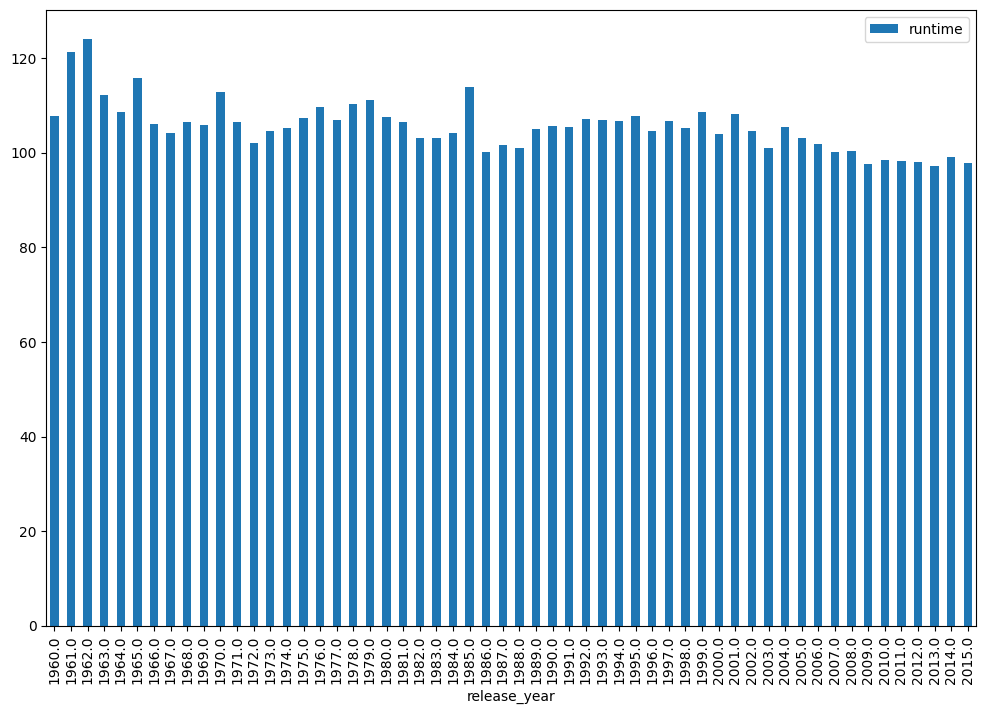

In [75]:
df = movies_data.drop_duplicates().sort_values("runtime")
df = df[df["runtime"] > 0]
df = df.groupby("release_year")["runtime"].mean().reset_index()
df.plot(x="release_year", y="runtime", kind="bar", figsize=(12,8))

8

In [43]:


for i, movie in enumerate(movies_data['budget']):
    if movie <= 100 : 
        movies_data.loc[i, 'budget'] = np.nan
#print(movies_data)
mean_budget_ever = movies_data['budget'].mean()
print('The average Budget of films throughout history: {}$'.format(mean_budget_ever))

The average Budget of films throughout history: 31015391.665105388$


9

In [44]:

for i, movie in enumerate(movies_data['revenue']):
    if movie <= 100 : 
        movies_data.loc[i, 'revenue'] = np.nan
#print(movies_data)
mean_revenue_ever = movies_data['revenue'].mean()
print('The average Revenue of films throughout history: {}$'.format(mean_revenue_ever))

The average Revenue of films throughout history: 89925226.9262261$


10

In [124]:

mean_budget_per_year = movies_data.groupby("release_year")[["budget", "revenue"]].mean()

pd.DataFrame(mean_budget_per_year)




,budget,revenue
release_year,,
1960,2.450772e+06,2.071500e+07
1961,3.549000e+06,3.377202e+07
1962,3.908723e+06,2.395332e+07
1963,6.666500e+06,2.677214e+07
1964,3.589378e+06,4.262272e+07
1965,6.382283e+06,9.161637e+07
1966,4.796233e+06,1.694734e+07
1967,5.591789e+06,5.270247e+07
1968,4.795933e+06,2.206108e+07


11

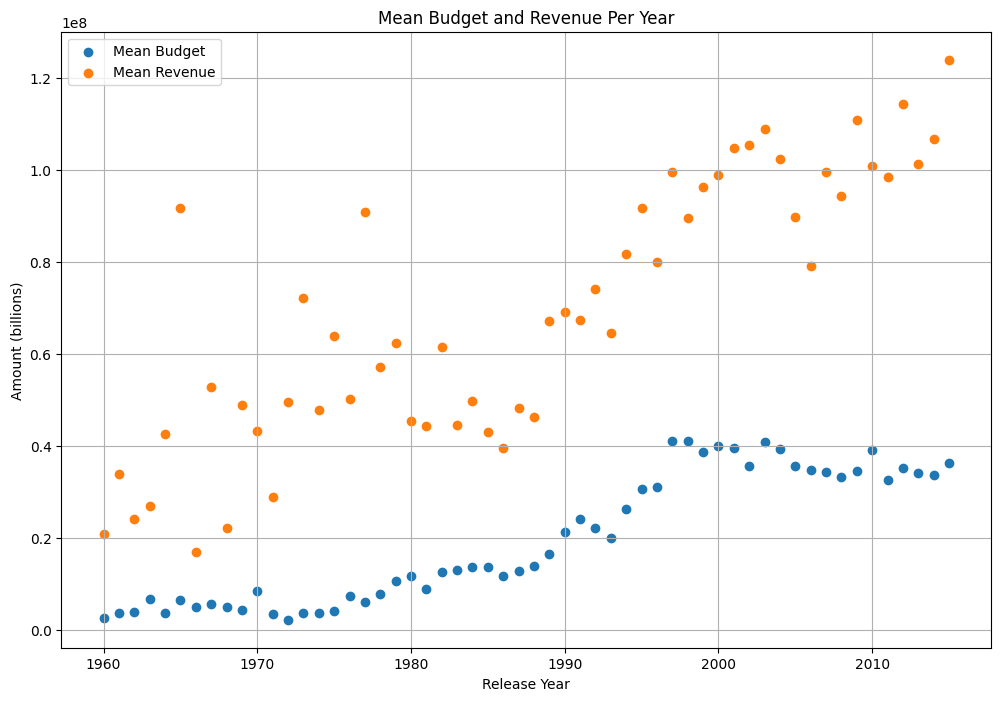

In [111]:
mean_budget_per_year = movies_data.groupby("release_year")[["budget_adj", "revenue_adj"]].mean()

mean_budget_per_year_df = pd.DataFrame(mean_budget_per_year)


plt.figure(figsize=(12, 8))

plt.scatter(mean_budget_per_year_df.index, mean_budget_per_year_df['budget'], label='Mean Budget')
plt.scatter(mean_budget_per_year_df.index, mean_budget_per_year_df['revenue'], label='Mean Revenue')
plt.title('Mean Budget and Revenue Per Year')
plt.xlabel('Release Year')
plt.ylabel('Amount (billions)')  
plt.legend()
plt.grid(True)
plt.show()


12

             Genres  count
0             Drama   4761
1            Comedy   3793
2          Thriller   2908
3            Action   2385
4           Romance   1712
5            Horror   1637
6         Adventure   1471
7             Crime   1355
8            Family   1231
9   Science Fiction   1230
10          Fantasy    916
11          Mystery    810
12        Animation    699
13      Documentary    520
14            Music    408
15          History    334
16              War    270
17          Foreign    188
18         TV Movie    167
19          Western    165
20   No Information     23


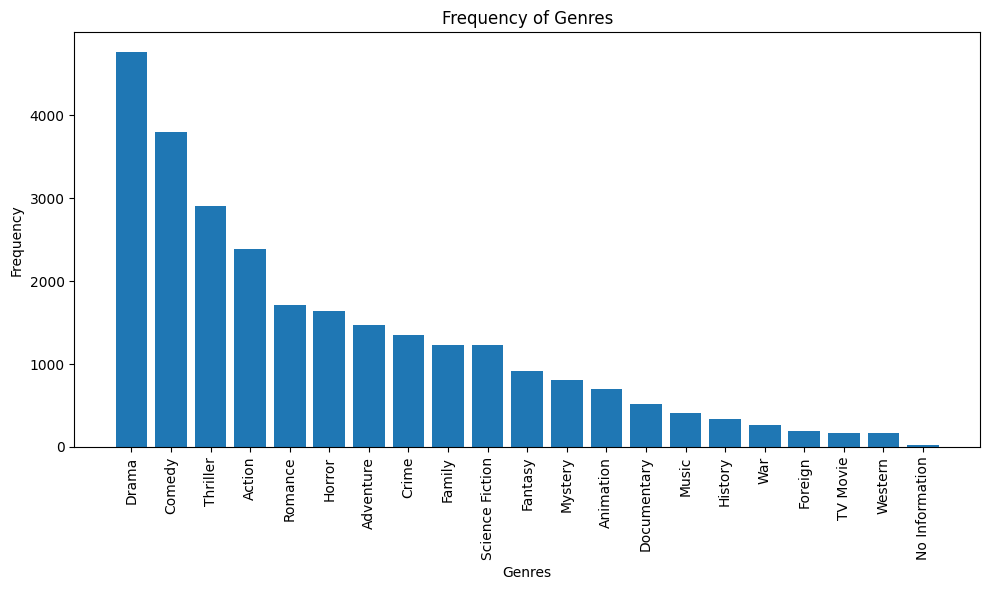

In [84]:
all_genres = []
for i, gen in enumerate(movies_data['genres']):
    if type(gen) != str :
        movies_data.loc[i, 'genres'] = 'No Information'
for i in range(0 , len(movies_data['genres'])) :
    genres = movies_data['genres'][i].split('|')
    for genre in genres :
        all_genres.append(genre)
unique_genres = pd.Series(all_genres).value_counts().reset_index()
genres_data_frame = pd.DataFrame(unique_genres).rename(columns={'index' : 'Genres'})
print(genres_data_frame)

plt.figure(figsize=(10, 6))
plt.bar(genres_data_frame['Genres'], genres_data_frame['count']) 
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()



13

In [125]:
movies_data['profit_per_movie'] = movies_data['revenue_adj'] - movies_data['budget_adj']
profit_df = movies_data[['original_title', 'profit_per_movie']]
print(profit_df)

                     original_title  profit_per_movie
0                    Jurassic World      1.363529e+09
1                Mad Max: Fury Road      2.284364e+08
2                         Insurgent      1.852382e+08
3      Star Wars: The Force Awakens      1.868178e+09
4                         Furious 7      1.316249e+09
...                             ...               ...
10861            The Endless Summer               NaN
10862                    Grand Prix               NaN
10863           Beregis Avtomobilya               NaN
10864        What's Up, Tiger Lily?               NaN
10865      Manos: The Hands of Fate               NaN

[10866 rows x 2 columns]


14

In [13]:
movies_data['profit_per_movie'] = movies_data['revenue_adj'] - movies_data['budget_adj']
most_profitable_movies_per_year = movies_data.groupby('release_year')['profit_per_movie'].max()
pd.DataFrame(most_profitable_movies_per_year)



,profit_per_movie
release_year,
1960,48000000
1961,211880014
1962,58500000
1963,76398765
1964,121400000
1965,155014286
1966,26236689
1967,201843612
1968,44715371


15

In [9]:
all_companies = []
for i, company in enumerate(movies_data['production_companies']):
    if type(company) != str :
        movies_data.loc[i, 'production_companies'] = 'No Information'
for i in range(0 , len(movies_data['production_companies'])) :
    companies = movies_data['production_companies'][i].split('|')
    for comp in companies :
        all_companies.append(comp)
unique_companies = pd.Series(all_companies).value_counts().reset_index()
pd.DataFrame(unique_companies).rename(columns={'index' : 'Company'})


,Company,count
0,No Information,1030
1,Universal Pictures,522
2,Warner Bros.,509
3,Paramount Pictures,431
4,Twentieth Century Fox Film Corporation,282
...,...,...
7875,Monophonic Inc.,1
7876,Populist Pictures,1
7877,Qatsi Productions,1
7878,CineEvelyn,1


16

In [42]:
top_five_films = movies_data.sort_values(by='vote_count', ascending=False).head(5)
top_five_films = top_five_films[['original_title', 'vote_count']]
pd.DataFrame(top_five_films)


,original_title,vote_count
1919,Inception,9767
4361,The Avengers,8903
1386,Avatar,8458
2875,The Dark Knight,8432
4364,Django Unchained,7375


17

In [41]:
top_five_films = movies_data.sort_values(by='vote_average', ascending=False).head(5)
top_five_films = top_five_films[['original_title', 'vote_average']]
pd.DataFrame(top_five_films)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
2269,Life Cycles,8.8
1200,Black Mirror: White Christmas,8.8
6911,Pink Floyd: Pulse,8.7
